In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Data preprocessing
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create the model
model = Sequential([
     Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
     MaxPooling2D((2, 2)),
     Dropout(0.25),

     Conv2D(64, (3, 3), activation='relu'),
     MaxPooling2D((2, 2)),
     Dropout(0.25),

     Conv2D(128, (3, 3), activation='relu'),
     MaxPooling2D((2, 2)),
     Dropout(0.25),

     Flatten(),
     Dense(128, activation='relu'),
     Dropout(0.5),
     Dense(10, activation='softmax')

])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4740 - loss: 1.3765 - val_accuracy: 0.7737 - val_loss: 0.5999
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7534 - loss: 0.6696 - val_accuracy: 0.8142 - val_loss: 0.5080
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7910 - loss: 0.5811 - val_accuracy: 0.8350 - val_loss: 0.4456
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8144 - loss: 0.5211 - val_accuracy: 0.8456 - val_loss: 0.4163
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8243 - loss: 0.4865 - val_accuracy: 0.8573 - val_loss: 0.3842
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8368 - loss: 0.4520 - val_accuracy: 0.8625 - val_loss: 0.3655
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8425 - loss: 0.4347 - val_accuracy: 0.8706 - val_loss: 0.3504
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8493 - loss: 0.4151 - val_accu

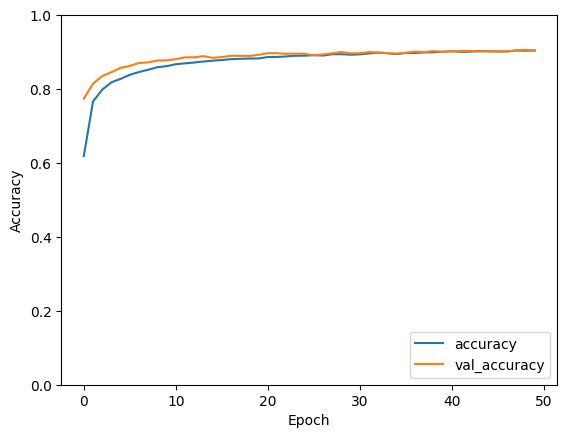

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()